[[567. 464.]
 [587. 447.]
 [609. 427.]
 [628. 412.]
 [641. 397.]
 [664. 382.]
 [686. 350.]]
lArrayNeg:  [1.06185811 1.06574018 1.06634325 1.06812298 1.06909709 1.07144489
 1.07258138 1.07565122 1.0756814  1.076774   1.07514064 1.07427831
 1.07385803 1.07363553 1.07321238 1.07132511 1.06834147 1.06731068
 1.06288011 1.06074309 1.05642321 1.05395761 1.04843542 1.04496177
 1.04185041 1.03907983 1.03566833 1.03045605 1.03582688 1.02893445
 1.02919755 1.03339234 1.04129419 1.03264675 1.03159479]
rArrayNeg:  [0.04020391 0.04558217 0.04968932 0.0538525  0.05799156 0.06222261
 0.0663778  0.07068481 0.0759583  0.07898117 0.08297645 0.08816966
 0.09106996 0.09630448 0.0991977  0.10426178 0.1080529  0.11086018
 0.11559088 0.11940783 0.12292336 0.12665561 0.12999043 0.13351072
 0.13708189 0.14064313 0.14412178 0.14731676 0.15199015 0.15488826
 0.15992288 0.16337326 0.16967022 0.17217522 0.17478808]
xiPrimeNegarray [-17.28188265 -16.38157906 -14.82407971 -13.70476405 -12.4715436
 -11.64286103 -10.5

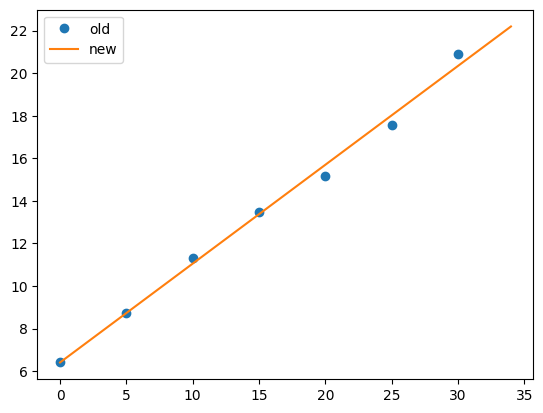

<Figure size 640x480 with 0 Axes>

In [15]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]

    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayPos[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]
    
    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayNeg[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayNeg[i] = l









# for i in range(35):
#     surplus = (i - 5*(i // 5))/5

#     lArrayNegNew[i] = lArrayNeg[i//5]*(1 - surplus) + lArrayNeg[i//5 + 1]*(surplus)
#     lArrayPosNew[i] = lArrayPos[i//5]*(1 - surplus) + lArrayPos[i//5 + 1]*(surplus)
print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [16]:
def trueXi(l, r, xiPrime, epsilon):
    

    d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    sol = fsolve(func, xiPrime)

    print("d: ", d)
    print("l: ", l)
    print("r: ", r)
    print("epsilon: ", epsilon)
    print("xiPrime: "   , xiPrime)
    print("func(sol) = " , func(sol))
    print("xi: ", sol)
    if(xiPrime == sol):
        return np.nan
    return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], xiPrimeNegArray[i], epsilonArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], xiPrimePosArray[i], epsilonArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)

xiPrimeNegArray:  [-17.28188265 -16.38157906 -14.82407971 -13.70476405 -12.4715436
 -11.64286103 -10.59649796 -10.0134919   -8.73251692  -7.94952851
  -6.59474821  -5.35375082  -4.44276783  -3.42108047  -2.58844716
  -1.39179156  -0.1646728    0.64681097   2.06405006   3.03251262
   4.25924922   5.19758368   6.49807451   7.4924764    8.41229333
   9.26211222  10.16491628  11.24907937  11.11454627  12.34269394
  12.82184349  12.78270902  12.49911524  13.82200324  14.31900455]
xiPrimePosArray:  [34.43474636 35.02599614 34.83614005 35.08369564 35.21807204 35.7575885
 36.07750446 36.86260337 37.07312118 37.5330481  37.5467268  37.79717951
 38.12907859 38.59885709 39.00911746 39.30394013 39.4453914  39.87677225
 39.95097825 40.35128276 40.49011383 40.92046225 40.98889752 41.35984963
 41.80887432 42.32451876 42.79047992 43.0752905  44.57510656 44.71585649
 45.7280913  47.01005251 48.78504558 48.83112948 49.57693579]
d:  0.16605489813117646
l:  1.061858109076319
r:  0.0402039149950303
epsilon

In [17]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[:maxImages]))



negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  0.22032720075035003
pos b:  38.533841866477225
pos mean:  40.62695027360556
pos sigma: 1.2902982377996515
neg m:  1.026975737738181
neg b:  -22.81874170870894
neg mean:  -13.062472200196222
neg sigma: 5.927010711559425


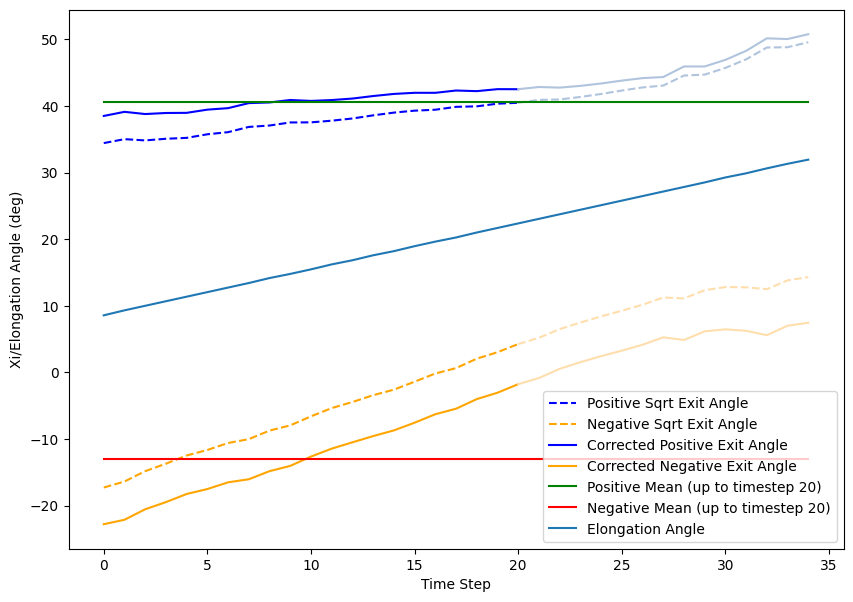

In [21]:
fig, axs = plt.subplots(figsize=(10,7))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

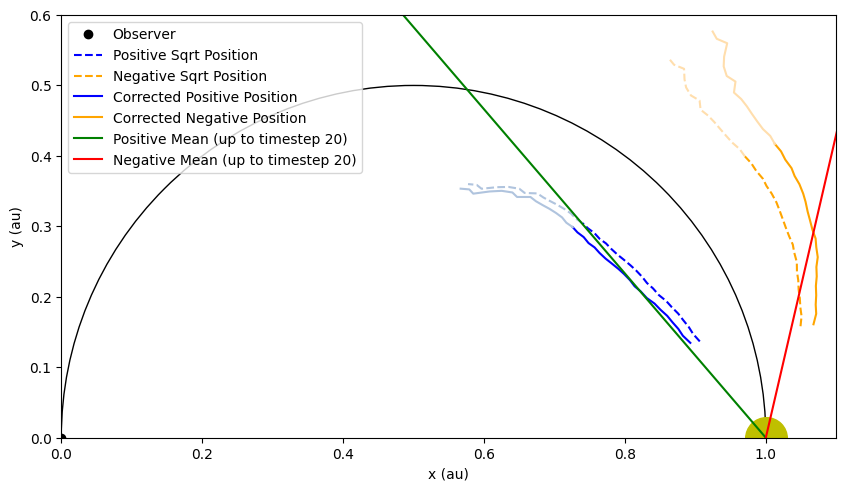

In [22]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(10,10))
axs.plot(0,0, 'ko', label = 'Observer')
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')


axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.6)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

plt.show()